# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#reading in files
act_17 = pd.read_csv('../data/act_2017.csv') 
sat_17 = pd.read_csv('../data/sat_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#checking ACT head 
act_17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [4]:
#checking SAT head
sat_17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
#checking ACT info for dataypes and null values
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [6]:
#checking SAT info for datatypes and null values 
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
#inspecting number of unique elements in SAT dataset
sat_17.nunique()

State                                 51
Participation                         34
Evidence-Based Reading and Writing    46
Math                                  46
Total                                 48
dtype: int64

In [8]:
#inspecting number of unique elements in ACT dataset
act_17.nunique()

State            52
Participation    28
English          36
Math             34
Reading          39
Science          35
Composite        38
dtype: int64

In [9]:
#checking ACT stats to get a feel for the numbers and looking for any outliers or possible errors in the data
act_17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [10]:
#checking SAT stats, the min Math value is almost 10 times lower than the rest
sat_17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [11]:
#checking ACT for duplicate values
act_17.duplicated().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [12]:
#checking SAT for duplicates
sat_17.duplicated().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

#### 4a. Does the data look complete? 

Answer:

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: The minimum SAT score is 400, while the maximum SAT score is 1600. The minimum ACT score is 1 while maximum ACT score is 36. Maryland has a value of 52 for the SAT math score, which is well below the minimum possible score.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

In [13]:
#Maryland's SAT Math score should be 524 and Maryland's ACT Science should be 23.2 to reflect correct values (link above)
sat_17['Math'].replace((52, 524),inplace=True)
act_17['Math'].replace((2.3, 23.2),inplace=True)
act_17['Composite'].replace(('20.2x', 20.2),inplace=True) # to eliminate x 

#### 5. What are your data types? 
Display the data types of each feature. 

In [14]:
act_17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [15]:
sat_17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [16]:
#defining a function that first removes a percent sign if present and then returns the original string as a floating value
def convert_type(x):
    x = x.strip('%')
    x = float(x)/100
    return x

- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
#coverting the columns to the correct data type by applying the previously defined function
sat_17['Participation']= sat_17['Participation'].apply(convert_type)
act_17['Participation']= act_17['Participation'].apply(convert_type)


In [18]:
act_17['Composite']= act_17['Composite'].apply(convert_type)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [19]:
act_17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

In [20]:
sat_17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
#resetting column names for easier readability when combined with other dataframe
act_17.columns = ['state', 'act_part', 'a17_eng', 'a17_math', 'a17_read', 'a17_sci', 'a17_avg']
sat_17.columns = ['state', 's17_part', 's17_read', 's17_math', 's17_total']

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [22]:
#dropping the 'National' row from ACT dataframe
act_17.drop(index=0, inplace=True)

In [23]:
#ensuring it dropped
act_17.head(3)

,state,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg
1,Alabama,1.00,18.9,18.4,19.7,19.4,0.192
2,Alaska,0.65,18.7,19.8,20.4,19.9,0.198
3,Arizona,0.62,18.6,19.8,20.1,19.8,0.197


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [24]:
#Code: Merging the two dataframes on the 'state' column and storing that new df to the combined_2017 variable
combined_2017 = pd.merge(sat_17, act_17, on='state')

In [25]:
# ensuring new datafame looks as expected
combined_2017.head()

,state,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,0.192
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,0.198
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,0.197
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,0.194
4,California,0.53,531,594,1055,0.31,22.5,22.7,23.1,22.2,0.228


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [26]:
#reading out the combined df to a csv file and making sure it doesn't create a new index column in that file
#commenting out so duplicate files aren't created when restarting kernel
#combined_2017.to_csv('../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [27]:
#reading in the 2018 ACT and SAT csv files and storing them to new df
act_18 = pd.read_csv('../data/act_2018.csv') 
sat_18 = pd.read_csv('../data/sat_2018.csv')

In [28]:
#examining head of ACT 2018
act_18.head(3)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2


In [29]:
#examining head of SAT 2018
sat_18.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149


In [30]:
#checking df information for null values and data types 
#same as in 2017 df, participation is saved as an object and there are 52 rows despite no 'national' as before
act_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [31]:
#checking SAT df for null values and data types, again participation is saved as an object
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [32]:
#checking 2018 ACT statistical information, min and max values seem within expected range
act_18.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [33]:
#checking 2018 SAT statistical information 
sat_18.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [34]:
#inspecting number of unique elements
act_18.nunique()

State            51
Participation    29
Composite        39
dtype: int64

In [35]:
#nspecting number of unique elements
sat_18.nunique()

State                                 51
Participation                         33
Evidence-Based Reading and Writing    39
Math                                  46
Total                                 47
dtype: int64

In [36]:
#looking for SAT duplicates
sat_18.duplicated().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [37]:
#looking for SAT duplicates, one row appears to be duplicated
act_18.duplicated().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [38]:
#Maine has been copied twice which explains why there are 52 rows in this dataset 
act_18[18:22]

,State,Participation,Composite
18,Louisiana,100%,19.2
19,Maine,7%,24.0
20,Maine,7%,24.0
21,Maryland,31%,22.5


In [39]:
#keeping the first instance of Maine and dropping the other row
act_18.drop_duplicates(subset=None, keep="last", inplace = True)

In [40]:
#verifying the drop worked
act_18[18:22]

,State,Participation,Composite
18,Louisiana,100%,19.2
20,Maine,7%,24.0
21,Maryland,31%,22.5
22,Massachusetts,25%,25.5


In [41]:
act_18.shape

(51, 3)

In [42]:
# converting the participation datatypes from string to float, the same as in the 2017 datasets
sat_18['Participation']= sat_18['Participation'].apply(convert_type)
act_18['Participation']= act_18['Participation'].apply(convert_type)

In [43]:
#ensuring the data was properly converted
sat_18.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [44]:
act_18.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [45]:
#resetting column names for easier readability when combined with other dataframe
act_18.columns = ['state', 'a18_part', 'a18_avg']
sat_18.columns = ['state', 's18_part', 's18_rw', 's18_math', 's18_total']

In [46]:
#ensuring they set 
sat_18.columns

Index(['state', 's18_part', 's18_rw', 's18_math', 's18_total'], dtype='object')

In [47]:
#confirming column names are changed 
act_18.head(2)

,state,a18_part,a18_avg
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8


In [48]:
#merging the two datasets on state and saving that to a combined variable
combined_2018 = pd.merge(sat_18, act_18, on='state')

In [49]:
#checking df to confirm it merged correctly 
combined_2018.head()

,state,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7


In [50]:
# making sure no row was erroneaously duplicated
combined_2018.duplicated().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [51]:
combined_2018.describe()

,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.448200,565.020000,557.760000,1122.880000,0.623200,21.454000
std,0.370976,47.010416,46.987432,92.845634,0.341141,2.111312
min,0.020000,480.000000,486.000000,998.000000,0.070000,17.700000
25%,0.042500,535.000000,524.250000,1062.250000,0.277500,19.925000
50%,0.500000,552.000000,545.500000,1098.500000,0.660000,21.050000
75%,0.745000,612.750000,594.250000,1207.000000,1.000000,23.650000
max,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [52]:
#merging all the data into a final dataframe 
final = pd.merge(combined_2017, combined_2018, on='state')

In [53]:
#checking to make sure the new df looks as expected
final.head()

,state,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,0.192,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,0.198,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,0.197,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,0.194,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,594,1055,0.31,22.5,22.7,23.1,22.2,0.228,0.60,540,536,1076,0.27,22.7


In [55]:
def convert_type_int(x):
    x = float(x) * 100
    return x

In [56]:
final['a17_avg']= final['a17_avg'].apply(convert_type_int)

In [57]:
final

,state,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,594,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.30,23.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
8,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.56,550,549,1099,0.66,19.9
9,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,21.4,0.70,542,522,1064,0.53,21.4


In [54]:
# double checking to make sure all participation columns are formatted as floats
final.dtypes

state         object
s17_part     float64
s17_read       int64
s17_math       int64
s17_total      int64
act_part     float64
a17_eng      float64
a17_math     float64
a17_read     float64
a17_sci      float64
a17_avg      float64
s18_part     float64
s18_rw         int64
s18_math       int64
s18_total      int64
a18_part     float64
a18_avg      float64
dtype: object

In [97]:
# the merging went as expected and the data is set to be read out
final.duplicated().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [98]:
#exporting the final dataset out as a csv file, commenting out so duplicate files aren't created when restarting kernel
#final.to_csv('../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [99]:
final.describe()

,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.386000,570.860000,559.700000,1129.620000,0.659200,20.862000,21.13600,21.956000,20.992000,0.214720,0.448200,565.020000,557.760000,1122.880000,0.623200,21.454000
std,0.345602,44.385146,46.264215,89.913085,0.321107,2.324307,1.97399,2.046317,3.195139,0.020008,0.370976,47.010416,46.987432,92.845634,0.341141,2.111312
min,0.020000,503.000000,492.000000,996.000000,0.080000,16.300000,18.00000,18.100000,2.300000,0.178000,0.020000,480.000000,486.000000,998.000000,0.070000,17.700000
25%,0.040000,535.250000,523.750000,1057.000000,0.310000,19.000000,19.40000,20.425000,19.900000,0.198000,0.042500,535.000000,524.250000,1062.250000,0.277500,19.925000
50%,0.340000,559.500000,551.000000,1107.500000,0.710000,20.550000,20.90000,21.700000,21.100000,0.214000,0.500000,552.000000,545.500000,1098.500000,0.660000,21.050000
75%,0.650000,613.500000,601.000000,1214.000000,1.000000,23.100000,23.00000,23.875000,22.275000,0.234000,0.745000,612.750000,594.250000,1207.000000,1.000000,23.650000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.30000,26.000000,24.900000,0.255000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [100]:
#need to create function that takes in a variable, loops through and returns the std dev
#The standard deviation is the square root of the average of the squared deviations from the mean
#Work out the Mean 
#Then for each number: subtract the Mean and square the result.
#Then work out the mean of those squared differences.
#Finally, Take the square root of that
def std_dev(s):       
        length = len(s) # need to determine the length of items being passed in
        mean = sum(s)/len(s) # calculate the mean
        count = 0   # start count variable for loop
        for i in range(length):  # loop through all items in range of the length..really just variable pass in func
            count += (s[i] - mean)**2 # for each item we loop though we subtract mean then square result
        return (count/length)**0.5  # finally we need to take the mean of that count and then find the square root
 

In [101]:
#test data to check function accuracy
dataset=[13, 22, 26, 38, 36, 42,49, 50, 77, 81, 98, 110]
print('Standard Deviation:', np.std(dataset)) 

Standard Deviation: 29.694275542602483


In [102]:
std_dev(dataset)

29.694275542602483

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [103]:
#create sd variable and apply the std_dev function to all the data...
#must filter out 'state'('object') as words cannot really have a sd so we need all data to be numeric 
sd = final.iloc[:, 1:].apply(std_dev)

In [124]:
sd.head()

s17_part      0.342129
s17_read     43.939053
s17_math     45.799236
s17_total    89.009413
act_part      0.317879
dtype: float64

In [125]:
np.std(final.iloc[:, 1:]).head() 

s17_part      0.342129
s17_read     43.939053
s17_math     45.799236
s17_total    89.009413
act_part      0.317879
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: They sure do!

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [126]:
final.sort_values(by='act_part', ascending=False).head()

,state,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,0.192,0.06,595,571,1166,1.0,19.1
16,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,0.200,0.04,630,618,1248,1.0,20.2
48,Wisconsin,0.03,642,649,1291,1.0,19.7,20.4,20.6,20.9,0.205,0.03,641,653,1294,1.0,20.5
43,Utah,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,0.203,0.04,480,530,1010,1.0,20.4
41,Tennessee,0.05,623,604,1228,1.0,19.5,19.2,20.1,19.9,0.198,0.06,624,607,1231,1.0,19.6


In [127]:
final.sort_values(by='s17_part', ascending=False).head() 

,state,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
21,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,0.241,1.00,511,499,1011,0.22,24.2
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,0.252,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,0.241,1.00,505,492,998,0.17,23.8
28,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,0.255,0.96,535,528,1063,0.16,25.1
18,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,0.243,0.99,512,501,1013,0.07,24.0


In [138]:
final.sort_values(by='a18_part', ascending=False).head()

,state,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,0.192,0.06,595,571,1166,1.0,19.1
16,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,0.200,0.04,630,618,1248,1.0,20.2
48,Wisconsin,0.03,642,649,1291,1.0,19.7,20.4,20.6,20.9,0.205,0.03,641,653,1294,1.0,20.5
43,Utah,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,0.203,0.04,480,530,1010,1.0,20.4
41,Tennessee,0.05,623,604,1228,1.0,19.5,19.2,20.1,19.9,0.198,0.06,624,607,1231,1.0,19.6


In [139]:
final.sort_values(by='s18_part', ascending=False).head()

,state,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,0.208,1.0,519,506,1025,0.30,23.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,0.252,1.0,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,0.241,1.0,505,492,998,0.17,23.8
21,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,0.241,1.0,511,499,1011,0.22,24.2
11,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,0.223,1.0,508,493,1001,0.36,22.3


In [135]:
fifty_fifty_club_17 = final[(final['s17_part'] >= .50) & (final['act_part'] >= .50)]  

In [137]:
fifty_fifty_club_17

,state,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
8,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,0.198,0.56,550,549,1099,0.66,19.9
9,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,0.214,0.70,542,522,1064,0.53,21.4
10,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,0.190,0.56,480,530,1010,0.89,18.9
39,South Carolina,0.50,543,521,1064,1.00,17.5,18.6,19.1,18.9,0.187,0.55,547,523,1070,1.00,18.3


In [140]:
fifty_fifty_club_18 = final[(final['s18_part'] >= .50) & (final['a18_part'] >= .50)]  

In [141]:
fifty_fifty_club_18

,state,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
8,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,0.198,0.56,550,549,1099,0.66,19.9
9,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,0.214,0.70,542,522,1064,0.53,21.4
10,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,0.190,0.56,480,530,1010,0.89,18.9
32,North Carolina,0.49,546,535,1081,1.00,17.8,19.3,19.6,19.3,0.191,0.52,554,543,1098,1.00,19.1
39,South Carolina,0.50,543,521,1064,1.00,17.5,18.6,19.1,18.9,0.187,0.55,547,523,1070,1.00,18.3


In [ ]:
wisconsin = final[final['state']=='Wisconsin']

In [143]:
wisconsin

,state,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
48,Wisconsin,0.03,642,649,1291,1.0,19.7,20.4,20.6,20.9,0.205,0.03,641,653,1294,1.0,20.5


In [145]:
wisconsin['s18_part'] + wisconsin['s17_part'] 

48    0.06
dtype: float64

In [146]:
final.sort_values(by='s17_total', ascending=False).head()

,state,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
22,Minnesota,0.03,644,651,1295,1.00,20.4,21.5,21.8,21.6,0.215,0.04,643,655,1298,0.99,21.3
48,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,0.205,0.03,641,653,1294,1.00,20.5
14,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,0.219,0.03,634,631,1265,0.68,21.8
24,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,0.204,0.04,633,629,1262,1.00,20.0
15,Kansas,0.04,632,628,1260,0.73,21.1,21.3,22.3,21.7,0.217,0.04,633,631,1265,0.71,21.6


In [148]:
final.sort_values(by='s18_total', ascending=False).head()

,state,s17_part,s17_read,s17_math,s17_total,act_part,a17_eng,a17_math,a17_read,a17_sci,a17_avg,s18_part,s18_rw,s18_math,s18_total,a18_part,a18_avg
22,Minnesota,0.03,644,651,1295,1.00,20.4,21.5,21.8,21.6,0.215,0.04,643,655,1298,0.99,21.3
48,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,0.205,0.03,641,653,1294,1.00,20.5
33,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,0.203,0.02,640,643,1283,0.98,20.3
14,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,0.219,0.03,634,631,1265,0.68,21.8
15,Kansas,0.04,632,628,1260,0.73,21.1,21.3,22.3,21.7,0.217,0.04,633,631,1265,0.71,21.6


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

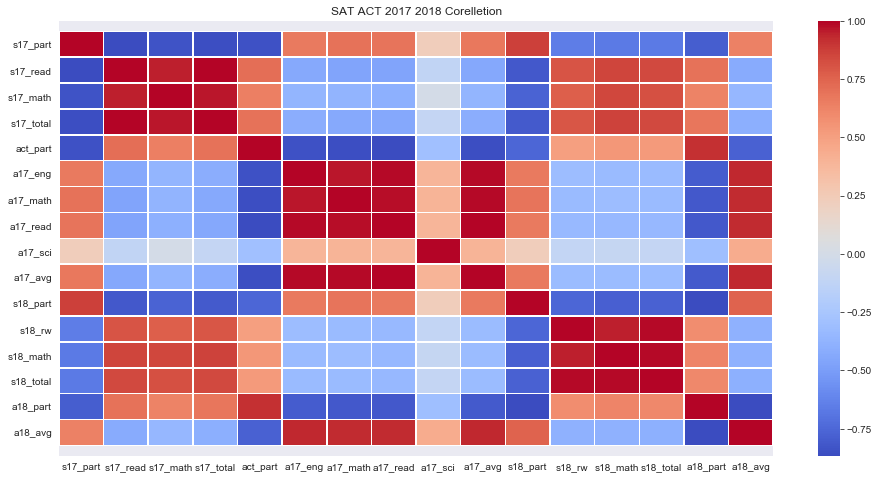

In [113]:
plt.figure(figsize=(16, 8))
plt.title('SAT ACT 2017 2018 Corelletion')

ax = sns.heatmap(final.corr(), linewidths=.5, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.4, top - 0.4)

ax

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [114]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [115]:
# Code

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [116]:
# Code

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [117]:
# Code

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

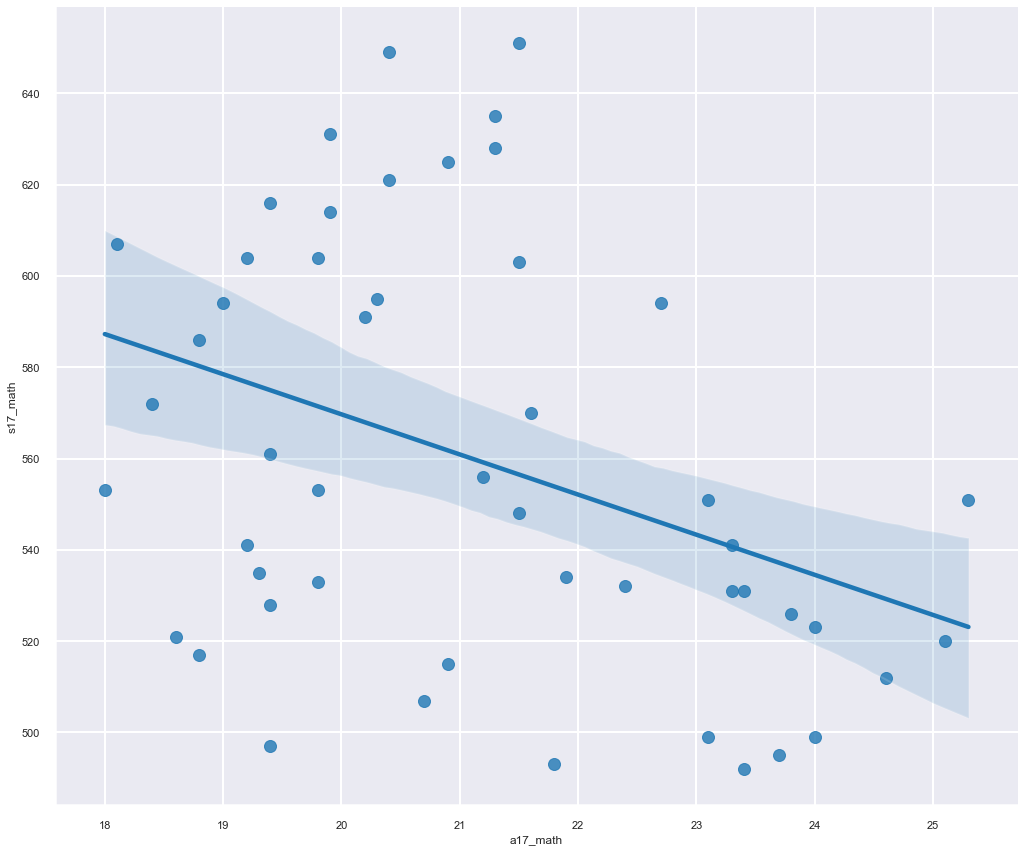

In [58]:
sns.set_context('poster',font_scale=.5)
sns.lmplot(x='a17_math',y='s17_math',data=final, height=12, aspect=1.2)

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [118]:
# Code: